In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest, norm, triang, weibull_min, uniform, lognorm,f_oneway



In [14]:
archivo_excel = 'Datos-FlexLatam.xlsx.'
nombre_de_la_pestana = 'DatosOperación'

df = pd.read_excel(archivo_excel, sheet_name=nombre_de_la_pestana)
df

,Load Time - Montacargas\n(Min),Unload Time - Montacargas\n(Min),Load Time/Unload Time - Operario\n(Seg),Inspección\n(Seg),Packing\n(Seg)
0,2.83298,1.40335,87.72180,61.15631,61.15631
1,2.75285,1.74106,133.74666,58.95252,58.95252
2,2.91692,2.85948,75.63390,58.91026,58.91026
3,1.39144,2.55732,59.51550,59.85828,59.85828
4,2.73253,2.55809,98.57688,59.96749,59.96749
...,...,...,...,...,...
45315,1.85360,2.61861,64.55419,59.98952,59.98952
45316,2.79065,1.41964,97.41202,61.31449,61.31449
45317,2.70445,2.76243,88.21483,59.53824,59.53824
45318,1.37180,1.22085,150.57843,59.19125,59.19125


In [15]:
# Renaming df columns
df.rename(columns={'Load Time/Unload Time - Operario\n(Seg)': 'Load Time/Unload Time - Operario Seg'}, inplace=True)
df.rename(columns={'Load Time - Montacargas\n(Min)': 'Load Time - Montacargas Min'}, inplace=True)
df.rename(columns={'Unload Time - Montacargas\n(Min)': 'Unload Time - Montacargas Min'}, inplace=True)
df.rename(columns={'Inspección\n(Seg)': 'Inspección Seg'}, inplace=True)
df.rename(columns={'Packing\n(Seg)': 'Packing Seg'}, inplace=True)

In [16]:
#Data cleansing
df['Load Time - Montacargas Seg'] = df['Load Time - Montacargas Min'] *60
df.drop(columns=['Load Time - Montacargas Min'], inplace=True)
df['Unload Time - Montacargas Seg'] = df['Unload Time - Montacargas Min'] *60
df.drop(columns=['Unload Time - Montacargas Min'], inplace=True)
df

,Load Time/Unload Time - Operario Seg,Inspección Seg,Packing Seg,Load Time - Montacargas Seg,Unload Time - Montacargas Seg
0,87.72180,61.15631,61.15631,169.9788,84.2010
1,133.74666,58.95252,58.95252,165.1710,104.4636
2,75.63390,58.91026,58.91026,175.0152,171.5688
3,59.51550,59.85828,59.85828,83.4864,153.4392
4,98.57688,59.96749,59.96749,163.9518,153.4854
...,...,...,...,...,...
45315,64.55419,59.98952,59.98952,111.2160,157.1166
45316,97.41202,61.31449,61.31449,167.4390,85.1784
45317,88.21483,59.53824,59.53824,162.2670,165.7458
45318,150.57843,59.19125,59.19125,82.3080,73.2510


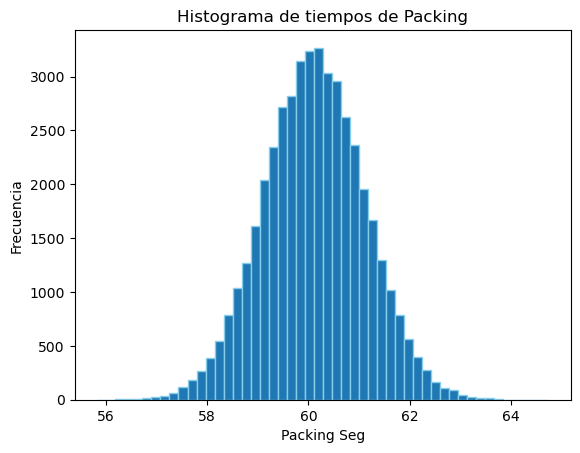

In [17]:
#Visualization of data
plt.hist(df['Packing Seg'], bins=50, edgecolor='skyblue')
plt.xlabel('Packing Seg')
plt.ylabel('Frecuencia')
plt.title('Histograma de tiempos de Packing')
plt.show()

c:\Users\Gabriel\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


Opción 1:
La columna de datos parece ajustarse mejor a la distribución 'norm'.
Valor p: 0.7790537678718445
Mejores parámetros estimados:
loc: 60.10826989320388
scale: 0.9997971797698245
Opción 2:
La columna de datos parece ajustarse mejor a la distribución 'beta'.
Valor p: 0.8225038727728671
Mejores parámetros estimados:
a: 7149.70310553327
b: 3371092.495635491
loc: -24.52104501397197
scale: 39987.442626906304
Opción 3:
La columna de datos parece ajustarse mejor a la distribución 't'.
Valor p: 0.7919369795573747
Mejores parámetros estimados:
df: 155.36599715512097
loc: 60.10861099384746
scale: 0.9938948828770879
Opción 4:
La columna de datos parece ajustarse mejor a la distribución 'gamma'.
Valor p: 0.8722371073286996
Mejores parámetros estimados:
a: 9462.695706962018
loc: -37.14799367624869
scale: 0.010277858039698898
Opción 5:
La columna de datos parece ajustarse mejor a la distribución 'lognorm'.
Valor p: 0.8789756629547754
Mejores parámetros estimados:
s: 0.006763326117857259
loc: 

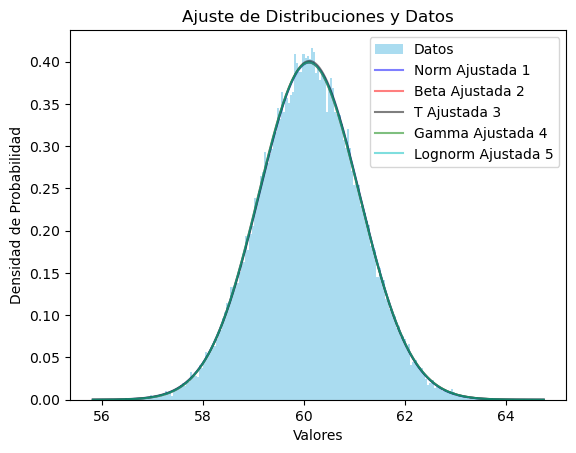

In [18]:
#Multiple test-of-fit for a column
columna = df['Packing Seg']
distribuciones = [
    {'nombre': 'norm', 'parametros': ('loc', 'scale')},
    {'nombre': 'expon', 'parametros': ('loc', 'scale')},
    {'nombre': 'uniform', 'parametros': ('loc', 'scale')},
    {'nombre': 'gamma', 'parametros': ('a', 'loc', 'scale')},
    {'nombre': 'lognorm', 'parametros': ('s', 'loc', 'scale')},
    {'nombre': 'beta', 'parametros': ('a', 'b', 'loc', 'scale')},
    {'nombre': 'pareto', 'parametros': ('b', 'loc', 'scale')},
    {'nombre': 't', 'parametros': ('df', 'loc', 'scale')},
    {'nombre': 'chi2', 'parametros': ('df', 'loc', 'scale')},
    {'nombre': 'f', 'parametros': ('dfn', 'dfd', 'loc', 'scale')},
    {'nombre': 'johnsonsb', 'parametros': ('a', 'b', 'loc', 'scale')},  
]



mejores_distribuciones = []
mejores_p_valores = []
mejores_parametros = []


for distribucion in distribuciones:
    nombre = distribucion['nombre']
    parametros = distribucion['parametros']
    
    
    dist = getattr(stats, nombre)  
    params = dist.fit(columna)
    
   
    estadistica, p_valor = stats.kstest(columna, nombre, args=params)
    
    
    if len(mejores_distribuciones) < 5:
        mejores_distribuciones.append(nombre)
        mejores_p_valores.append(p_valor)
        mejores_parametros.append({param: params[i] for i, param in enumerate(parametros)})
    else:
       
        min_p_valor = min(mejores_p_valores)
        if p_valor > min_p_valor:
            indice_min_p_valor = mejores_p_valores.index(min_p_valor)
            mejores_distribuciones[indice_min_p_valor] = nombre
            mejores_p_valores[indice_min_p_valor] = p_valor
            mejores_parametros[indice_min_p_valor] = {param: params[i] for i, param in enumerate(parametros)}


for i in range(5):
    print(f"Opción {i+1}:")
    print(f"La columna de datos parece ajustarse mejor a la distribución '{mejores_distribuciones[i]}'.")
    print(f"Valor p: {mejores_p_valores[i]}")
    print(f"Mejores parámetros estimados:")
    for param, valor in mejores_parametros[i].items():
        print(f"{param}: {valor}")
    print("="*30)

x = np.linspace(min(columna), max(columna), 1000)


plt.hist(columna, bins=213, density=True, alpha=0.7, color='skyblue', label='Datos')


for i in range(5):
    nombre = mejores_distribuciones[i]
    parametros = mejores_parametros[i]
    
    pdf = getattr(stats, nombre).pdf(x, *parametros.values())
    
    
    if i == 0:
        color = 'b'  
    elif i == 1:
        color = 'r' 
    elif i == 2:
        color = 'k'  
    elif i == 3:
        color = 'g'  
    elif i == 4:
        color = 'c' 
    

    plt.plot(x, pdf, color=color, alpha=0.5, label=f'{nombre.capitalize()} Ajustada {i+1}')

plt.legend()
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribuciones y Datos')

plt.show()

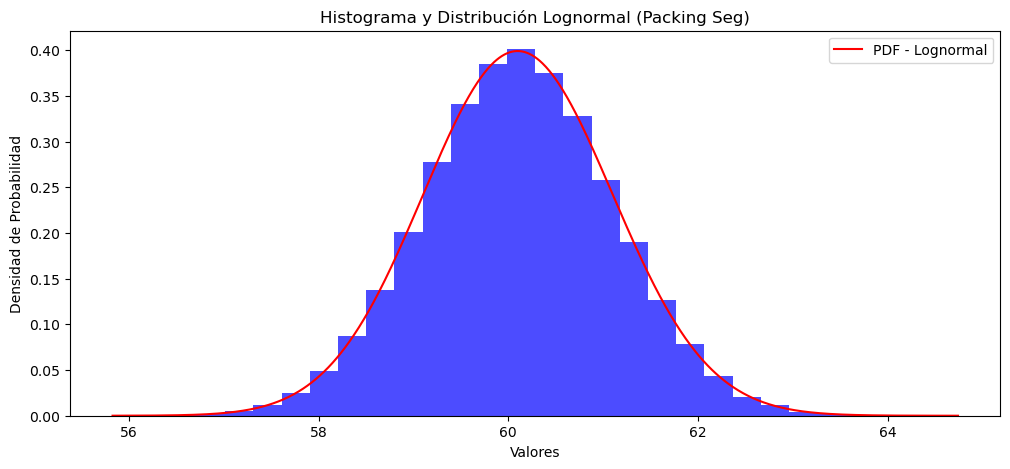

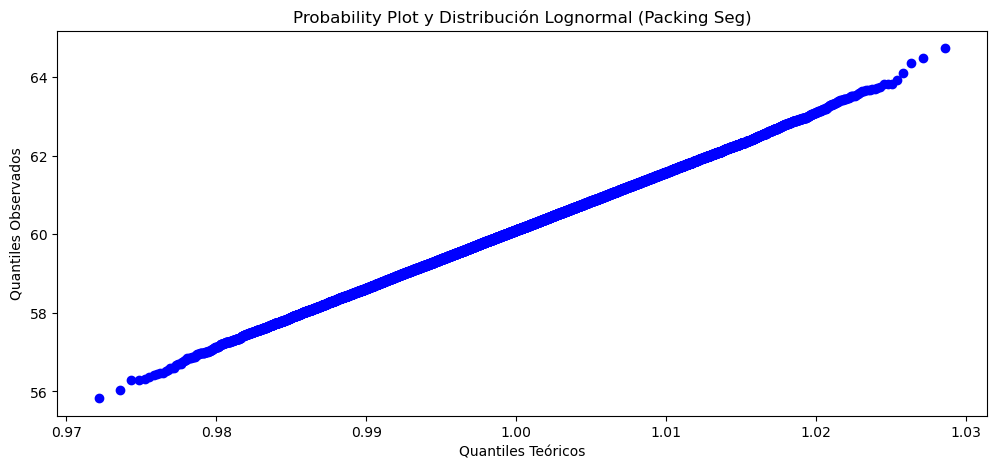

In [19]:
#Best fit analysis
data_packing = df['Packing Seg']
s_estimado = 0.006763326117857259
loc_estimado = -87.71616693128074
scale_estimado = 147.82105592632217
plt.figure(figsize=(12, 5))
plt.hist(data_packing, bins=30, density=True, color='blue', alpha=0.7)
x = np.linspace(data_packing.min(), data_packing.max(), 1000)
pdf_values = lognorm.pdf(x, s=s_estimado, loc=loc_estimado, scale=scale_estimado)
plt.plot(x, pdf_values, color='red', label='PDF - Lognormal')

plt.title('Histograma y Distribución Lognormal (Packing Seg)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
stats.probplot(data_packing, dist=lognorm, sparams=(s_estimado,), fit=False, plot=plt)

plt.title('Probability Plot y Distribución Lognormal (Packing Seg)')
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Quantiles Observados')
plt.show()

In [20]:
nombre_de_la_pestana = 'HistoricoLlegadas'
df3 = pd.read_excel(archivo_excel, sheet_name=nombre_de_la_pestana)

In [21]:
#Creates new data frames for each day of the week
df3['Fecha_Hora_Llegada'] = pd.to_datetime(df3['Fecha_Hora Llegada'])
df3['Dia_Semana'] = df3['Fecha_Hora_Llegada'].dt.day_name()
df_lunes = df3[df3['Dia_Semana'] == 'Monday'].copy()
df_martes = df3[df3['Dia_Semana'] == 'Tuesday'].copy()
df_miercoles = df3[df3['Dia_Semana'] == 'Wednesday'].copy()
df_jueves = df3[df3['Dia_Semana'] == 'Thursday'].copy()
df_viernes = df3[df3['Dia_Semana'] == 'Friday'].copy()
df_sabado = df3[df3['Dia_Semana'] == 'Saturday'].copy()
df_domingo = df3[df3['Dia_Semana'] == 'Sunday'].copy()

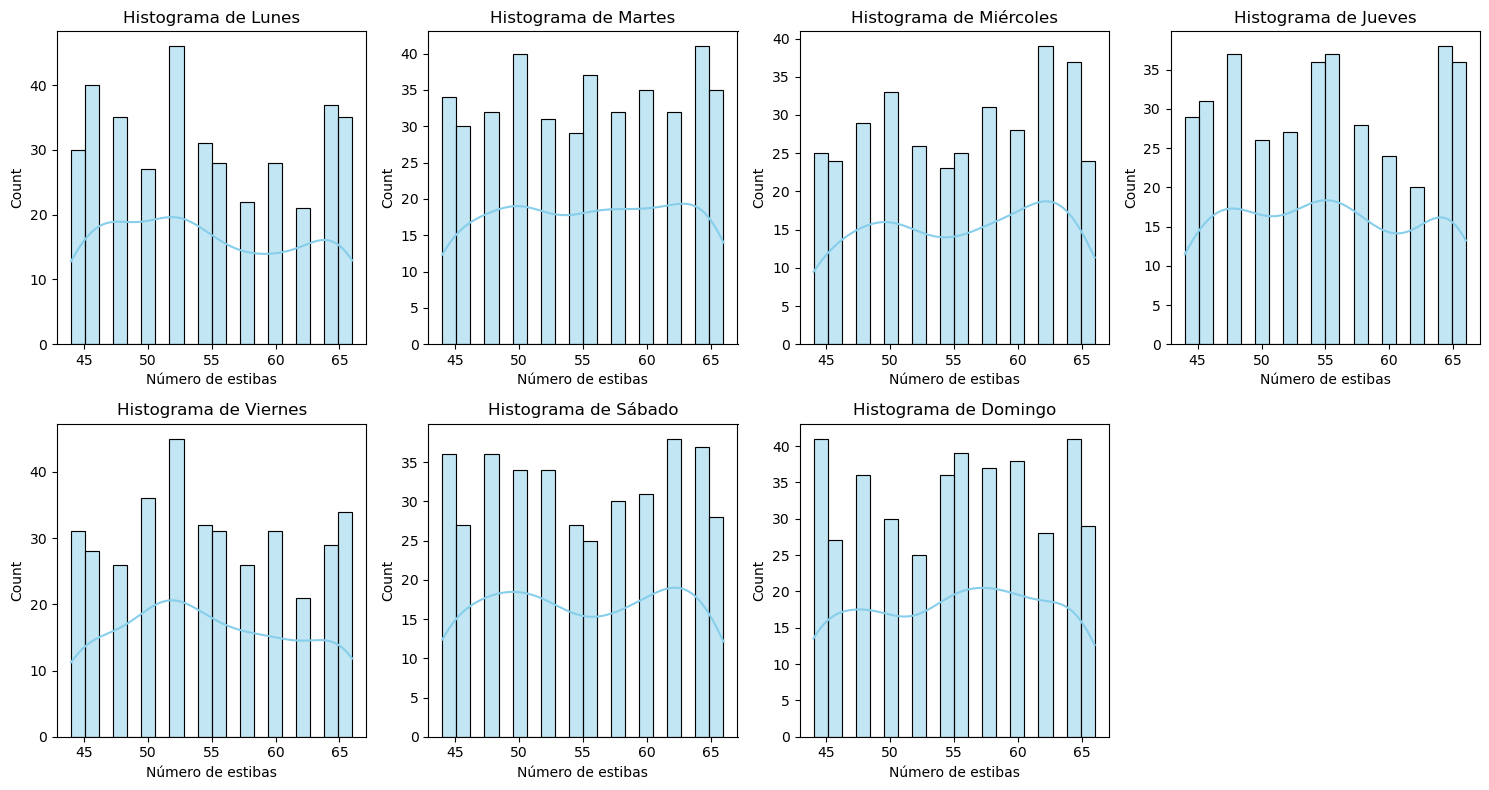

In [22]:
#Visualization of each day
dataframes = [df_lunes, df_martes, df_miercoles, df_jueves, df_viernes, df_sabado, df_domingo]
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(15, 8))

for i, df in enumerate(dataframes):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df['Número de estibas'], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {dias_semana[i]}')


plt.tight_layout()

plt.show()

In [23]:
#ANOVA to determine if days are statistically equal
datos_por_dia = [df_lunes['Número de estibas'].dropna(),
                 df_martes['Número de estibas'].dropna(),
                 df_miercoles['Número de estibas'].dropna(),
                 df_jueves['Número de estibas'].dropna(),
                 df_viernes['Número de estibas'].dropna(),
                 df_sabado['Número de estibas'].dropna(),
                 df_domingo['Número de estibas'].dropna()]
resultado_anova = f_oneway(*datos_por_dia)

print("Estadísticas de la prueba F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

if resultado_anova.pvalue < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula. Las medias no son iguales.")
else:
    print("No hay evidencia para rechazar la hipótesis nula. Las medias son iguales.")

Estadísticas de la prueba F: 0.592963070998361
Valor p: 0.7362278327455094
No hay evidencia para rechazar la hipótesis nula. Las medias son iguales.


   Número de estibas  Empirical_Distribution  Individual_Probabilities
0                 44                0.083333                  0.083333
1                 45                0.083333                  0.000000
2                 46                0.156863                  0.073529
3                 47                0.156863                  0.000000
4                 48                0.235294                  0.078431
5                 49                0.235294                  0.000000
6                 50                0.333333                  0.098039
7                 51                0.333333                  0.000000
8                 52                0.409314                  0.075980
9                 53                0.409314                  0.000000
10                54                0.480392                  0.071078
11                55                0.480392                  0.000000
12                56                0.571078                  0.090686
13    

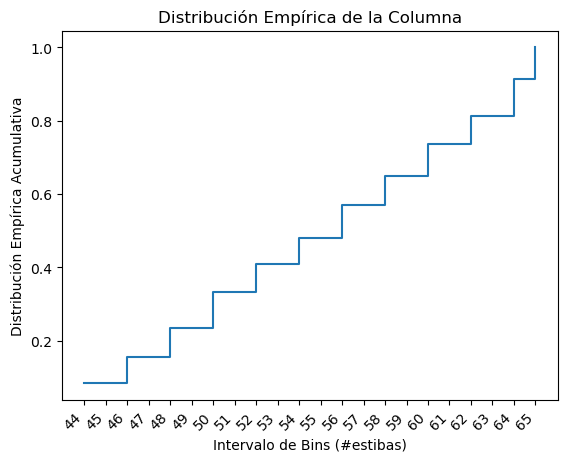

In [24]:
#Generate and graph empirical distribution
num_bins = df_martes['Número de estibas'].max()-df_martes['Número de estibas'].min()
hist, bin_edges = np.histogram(df_martes['Número de estibas'], bins=num_bins, density=True)

empirical_distribution = np.cumsum(hist * np.diff(bin_edges))
individual_probabilities = hist * np.diff(bin_edges)
df_empirical = pd.DataFrame({
    'Número de estibas': [f"{int(bin_edges[i])}" for i in range(num_bins)],
    'Empirical_Distribution': empirical_distribution,
    'Individual_Probabilities': individual_probabilities
})

print(df_empirical)

plt.step(df_empirical['Número de estibas'], df_empirical['Empirical_Distribution'], where='post')
plt.xlabel('Intervalo de Bins (#estibas)')
plt.ylabel('Distribución Empírica Acumulativa')
plt.title('Distribución Empírica de la Columna')
plt.xticks(rotation=45, ha='right')  
plt.show()